In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path

In [2]:
MAIN_DIR = Path(".").absolute()
BASEBALL_DIR = MAIN_DIR / "baseball_data"
POLIT_DIR = MAIN_DIR / "political_data"

In [50]:
teams_df = pd.read_csv(BASEBALL_DIR / "core" / "Teams.csv")
players_df = pd.read_csv(BASEBALL_DIR / "core" / "People.csv")
batting_df = pd.read_csv(BASEBALL_DIR / "core" / "Batting.csv")
pitching_df = pd.read_csv(BASEBALL_DIR / "core" / "Pitching.csv")
appearances_df = pd.read_csv(BASEBALL_DIR / "core" / "Appearances.csv")
batting_advanced_df = pd.read_csv(BASEBALL_DIR / 'advanced' / 'batting_advanced.csv')
pitching_advanced_df = pd.read_csv(BASEBALL_DIR / 'advanced' / 'pitching_advanced.csv')

In [19]:
batting_df = batting_df[batting_df["yearID"] >= 1899]

In [20]:
batting_df

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
7566,anderjo01,1899,1,BRO,NL,117,439,65,118,18,...,92.0,25.0,NaN,27,24.0,NaN,4.0,2.0,NaN,NaN
7567,atherch01,1899,1,WAS,NL,65,242,28,60,5,...,23.0,2.0,NaN,21,26.0,NaN,2.0,4.0,NaN,NaN
7568,baileha01,1899,1,BSN,NL,12,34,3,8,2,...,2.0,0.0,NaN,2,3.0,NaN,1.0,0.0,NaN,NaN
7569,bakerki01,1899,1,WAS,NL,12,19,1,3,0,...,1.0,0.0,NaN,1,6.0,NaN,0.0,0.0,NaN,NaN
7570,barreji01,1899,1,CIN,NL,26,92,30,34,2,...,10.0,4.0,NaN,18,7.0,NaN,1.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110490,zimmejo02,2021,1,MIL,NL,2,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
110491,zimmeky01,2021,1,KCA,AL,52,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
110492,zimmery01,2021,1,WAS,NL,110,255,27,62,16,...,46.0,0.0,0.0,16,77.0,0.0,0.0,0.0,2.0,9.0
110493,zuberty01,2021,1,KCA,AL,31,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
teams_df["minAB"] = 3.1 * teams_df['G']

In [7]:
batting_heavy_min = pd.merge(batting_df, teams_df[['minAB', 'yearID', 'teamID']], on=['yearID', 'teamID'])

In [8]:
batting_heavy_min

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,minAB
0,anderjo01,1899,1,BRO,NL,117,439,65,118,18,...,25.0,NaN,27,24.0,NaN,4.0,2.0,NaN,NaN,458.8
1,becker01,1899,1,BRO,NL,8,24,2,4,2,...,0.0,NaN,0,4.0,NaN,0.0,0.0,NaN,NaN,458.8
2,caseydo01,1899,2,BRO,NL,134,525,75,141,14,...,27.0,NaN,25,16.0,NaN,9.0,6.0,NaN,NaN,458.8
3,cassipe01,1899,1,BRO,NL,6,20,2,3,1,...,1.0,NaN,1,4.0,NaN,2.0,0.0,NaN,NaN,458.8
4,dahlebi01,1899,1,BRO,NL,121,428,87,121,22,...,29.0,NaN,67,23.0,NaN,15.0,4.0,NaN,NaN,458.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102924,wainwad01,2021,1,SLN,NL,34,57,1,7,2,...,0.0,0.0,3,25.0,0.0,0.0,14.0,0.0,2.0,502.2
102925,webbty01,2021,1,SLN,NL,22,1,0,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,502.2
102926,whitlko01,2021,1,SLN,NL,25,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,502.2
102927,williju02,2021,1,SLN,NL,51,119,10,19,0,...,0.0,1.0,17,46.0,5.0,1.0,0.0,0.0,2.0,502.2


In [9]:
batting_heavy_min = batting_heavy_min[batting_heavy_min["minAB"] < batting_heavy_min["AB"]]

In [10]:
batting_heavy_min

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,minAB
2,caseydo01,1899,2,BRO,NL,134,525,75,141,14,...,27.0,NaN,25,16.0,NaN,9.0,6.0,NaN,NaN,458.8
5,dalyto01,1899,1,BRO,NL,141,498,95,156,24,...,43.0,NaN,69,34.0,NaN,12.0,8.0,NaN,NaN,458.8
16,keelewi01,1899,1,BRO,NL,141,570,140,216,12,...,45.0,NaN,37,2.0,NaN,9.0,17.0,NaN,NaN,458.8
17,kellejo01,1899,1,BRO,NL,143,538,108,175,21,...,31.0,NaN,70,23.0,NaN,7.0,11.0,NaN,NaN,458.8
45,freembu01,1899,1,WAS,NL,155,588,107,187,19,...,21.0,NaN,23,25.0,NaN,18.0,5.0,NaN,NaN,480.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102873,verdual01,2021,1,BOS,AL,146,544,88,157,32,...,6.0,2.0,51,96.0,6.0,4.0,0.0,5.0,11.0,502.2
102878,arenano01,2021,1,SLN,NL,157,593,81,151,34,...,2.0,0.0,50,96.0,8.0,3.0,0.0,7.0,20.0,502.2
102881,carlsdy01,2021,1,SLN,NL,149,542,79,144,31,...,2.0,1.0,57,152.0,2.0,11.0,1.0,8.0,5.0,502.2
102886,edmanto01,2021,1,SLN,NL,159,641,91,168,41,...,30.0,5.0,38,95.0,1.0,6.0,2.0,4.0,4.0,502.2


In [34]:
batting_heavy_data = pd.merge(batting_heavy_min, players_df, on=["playerID"])
batting_heavy_data["fullName"] = batting_heavy_data["nameFirst"] + " " + batting_heavy_data["nameLast"]

In [35]:
batting_heavy_data

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,fullName
0,caseydo01,1899,2,BRO,NL,134,525,75,141,14,...,James Patrick,157.0,66.0,B,R,1898-09-14,1907-10-05,cased101,caseydo01,Doc Casey
1,caseydo01,1901,1,DET,AL,128,540,105,153,16,...,James Patrick,157.0,66.0,B,R,1898-09-14,1907-10-05,cased101,caseydo01,Doc Casey
2,caseydo01,1902,1,DET,AL,132,520,69,142,18,...,James Patrick,157.0,66.0,B,R,1898-09-14,1907-10-05,cased101,caseydo01,Doc Casey
3,caseydo01,1903,1,CHN,NL,112,435,56,126,8,...,James Patrick,157.0,66.0,B,R,1898-09-14,1907-10-05,cased101,caseydo01,Doc Casey
4,caseydo01,1904,1,CHN,NL,136,548,71,147,20,...,James Patrick,157.0,66.0,B,R,1898-09-14,1907-10-05,cased101,caseydo01,Doc Casey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,reynobr01,2021,1,PIT,NL,159,559,93,169,35,...,Bryan Patrick,205.0,75.0,B,R,2019-04-20,2021-10-03,reynb001,reynobr01,Bryan Reynolds
9524,francty01,2021,1,SEA,AL,152,571,85,166,32,...,Tyler Lawrence,217.0,71.0,R,R,2019-04-26,2021-10-03,frant002,francty01,Ty France
9525,hernaen02,2021,1,BOS,AL,134,508,84,127,35,...,Enrique J.,190.0,71.0,R,R,2014-07-01,2021-10-03,herne001,hernaen02,Enrique Hernandez
9526,renfrhu01,2021,1,BOS,AL,144,521,89,135,33,...,Dustin Hunter,230.0,73.0,R,R,2016-09-21,2021-10-03,renfh001,renfrhu01,Hunter Renfroe


In [69]:
batting_advanced_df

,yearID,Age,Tm,Lg,G,PA,Rbat,Rbaser,Rdp,Rfield,...,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Pos,Awards,bbrefID,teamID
0,1898,28,WHS,NL,28.0,117.0,-4.0,2.0,0.0,-2.0,...,0.490,0.498,0.3,-0.1,3.0,NaN,5/62,NaN,caseydo01,WHS
1,1899,29,WHS,NL,9.0,37.0,-5.0,0.0,0.0,-2.0,...,0.432,0.496,-0.3,-0.2,-3.0,NaN,/5,NaN,caseydo01,WHS
2,1899,29,BRO,NL,134.0,565.0,-18.0,0.0,0.0,-2.0,...,0.489,0.491,0.8,0.2,6.0,NaN,*5,NaN,caseydo01,BRO
3,1900,30,BRO,NL,1.0,4.0,0.0,0.0,0.0,0.0,...,0.530,0.500,0.0,0.0,0.0,NaN,/5,NaN,caseydo01,BRO
4,1901,31,DET,AL,128.0,593.0,-8.0,1.0,0.0,7.0,...,0.503,0.502,1.7,1.0,17.0,NaN,*5/H,NaN,caseydo01,DET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28234,2021,29,BOS,AL,144.0,572.0,9.0,-2.0,1.0,-1.0,...,0.502,0.502,2.3,-0.5,23.0,"$3,100,000",*9/8HD,NaN,renfrhu01,BOS
28235,2022,30,MIL,NL,13.0,51.0,-1.0,0.0,0.0,1.0,...,0.488,0.499,-0.1,0.1,-1.0,"$7,650,000",*9/3,NaN,renfrhu01,MIL
28236,2020,21,STL,NL,35.0,119.0,-6.0,-1.0,0.0,4.0,...,0.491,0.498,-0.3,0.4,-3.0,NaN,987/H,NaN,carlsdy01,STL
28237,2021,22,STL,NL,149.0,619.0,13.0,0.0,1.0,1.0,...,0.509,0.508,3.2,-0.2,33.0,NaN,*98/7H,RoY-3,carlsdy01,STL


In [70]:
batting_advanced_df['teamID'] = batting_advanced_df['Tm']

In [71]:
batting_advanced_df

,yearID,Age,Tm,Lg,G,PA,Rbat,Rbaser,Rdp,Rfield,...,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Pos,Awards,bbrefID,teamID
0,1898,28,WHS,NL,28.0,117.0,-4.0,2.0,0.0,-2.0,...,0.490,0.498,0.3,-0.1,3.0,NaN,5/62,NaN,caseydo01,WHS
1,1899,29,WHS,NL,9.0,37.0,-5.0,0.0,0.0,-2.0,...,0.432,0.496,-0.3,-0.2,-3.0,NaN,/5,NaN,caseydo01,WHS
2,1899,29,BRO,NL,134.0,565.0,-18.0,0.0,0.0,-2.0,...,0.489,0.491,0.8,0.2,6.0,NaN,*5,NaN,caseydo01,BRO
3,1900,30,BRO,NL,1.0,4.0,0.0,0.0,0.0,0.0,...,0.530,0.500,0.0,0.0,0.0,NaN,/5,NaN,caseydo01,BRO
4,1901,31,DET,AL,128.0,593.0,-8.0,1.0,0.0,7.0,...,0.503,0.502,1.7,1.0,17.0,NaN,*5/H,NaN,caseydo01,DET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28234,2021,29,BOS,AL,144.0,572.0,9.0,-2.0,1.0,-1.0,...,0.502,0.502,2.3,-0.5,23.0,"$3,100,000",*9/8HD,NaN,renfrhu01,BOS
28235,2022,30,MIL,NL,13.0,51.0,-1.0,0.0,0.0,1.0,...,0.488,0.499,-0.1,0.1,-1.0,"$7,650,000",*9/3,NaN,renfrhu01,MIL
28236,2020,21,STL,NL,35.0,119.0,-6.0,-1.0,0.0,4.0,...,0.491,0.498,-0.3,0.4,-3.0,NaN,987/H,NaN,carlsdy01,STL
28237,2021,22,STL,NL,149.0,619.0,13.0,0.0,1.0,1.0,...,0.509,0.508,3.2,-0.2,33.0,NaN,*98/7H,RoY-3,carlsdy01,STL


In [72]:
batting_heavy_abvanced = pd.merge(batting_heavy_data,batting_advanced_df, on=['yearID','bbrefID','teamID','G'])

In [73]:
batting_heavy_abvanced

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Pos,Awards
0,caseydo01,1899,2,BRO,NL,134,525,75,141,14,...,4.0,0.5,0.489,0.491,0.8,0.2,6.0,NaN,*5,NaN
1,caseydo01,1901,1,DET,AL,128,540,105,153,16,...,24.0,2.3,0.503,0.502,1.7,1.0,17.0,NaN,*5/H,NaN
2,caseydo01,1902,1,DET,AL,132,520,69,142,18,...,20.0,1.9,0.500,0.500,1.8,0.6,18.0,NaN,*5,NaN
3,caseydo01,1906,1,BRO,NL,149,571,71,133,17,...,17.0,1.6,0.498,0.498,2.4,-0.1,22.0,NaN,*5,NaN
4,caseydo01,1907,1,BRO,NL,141,527,55,122,19,...,18.0,1.9,0.500,0.500,1.5,1.0,14.0,NaN,*5/H,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,newmake01,2021,1,PIT,NL,148,517,50,117,22,...,7.0,0.5,0.492,0.492,-0.1,1.3,1.0,NaN,*64H,NaN
5607,reynobr01,2021,1,PIT,NL,159,559,93,169,35,...,61.0,6.0,0.525,0.524,6.5,-0.3,66.0,NaN,*87/HD,"AS,MVP-11"
5608,francty01,2021,1,SEA,AL,152,571,85,166,32,...,43.0,4.3,0.514,0.513,4.1,-0.5,41.0,NaN,3D4/5H,NaN
5609,hernaen02,2021,1,BOS,AL,134,508,84,127,35,...,48.0,4.9,0.521,0.518,3.2,2.1,32.0,"$6,000,000",84/6H,NaN


In [105]:
batting_heavy_abvanced_final = batting_heavy_abvanced[['playerID', 'bbrefID', 'yearID', 'fullName', 'teamID', 'birthState', 'birthCountry', 'G','AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'HBP', 'SH', 'SF', 'WAR', 'oWAR', 'dWAR']]

In [106]:
batting_heavy_abvanced_final

,playerID,bbrefID,yearID,fullName,teamID,birthState,birthCountry,G,AB,R,...,SB,CS,BB,SO,HBP,SH,SF,WAR,oWAR,dWAR
0,caseydo01,caseydo01,1899,Doc Casey,BRO,MA,USA,134,525,75,...,27.0,NaN,25,16.0,9.0,6.0,NaN,0.5,0.8,0.2
1,caseydo01,caseydo01,1901,Doc Casey,DET,MA,USA,128,540,105,...,34.0,NaN,32,28.0,10.0,12.0,NaN,2.3,1.7,1.0
2,caseydo01,caseydo01,1902,Doc Casey,DET,MA,USA,132,520,69,...,22.0,NaN,44,17.0,7.0,9.0,NaN,1.9,1.8,0.6
3,caseydo01,caseydo01,1906,Doc Casey,BRO,MA,USA,149,571,71,...,22.0,NaN,52,51.0,8.0,17.0,NaN,1.6,2.4,-0.1
4,caseydo01,caseydo01,1907,Doc Casey,BRO,MA,USA,141,527,55,...,16.0,NaN,34,32.0,3.0,32.0,NaN,1.9,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,newmake01,newmake01,2021,Kevin Newman,PIT,CA,USA,148,517,50,...,6.0,1.0,27,41.0,1.0,6.0,3.0,0.5,-0.1,1.3
5607,reynobr01,reynobr01,2021,Bryan Reynolds,PIT,MD,USA,159,559,93,...,5.0,2.0,75,119.0,8.0,0.0,4.0,6.0,6.5,-0.3
5608,francty01,francty01,2021,Ty France,SEA,CA,USA,152,571,85,...,0.0,0.0,46,106.0,27.0,0.0,6.0,4.3,4.1,-0.5
5609,hernaen02,hernaen02,2021,Enrique Hernandez,BOS,NaN,P.R.,134,508,84,...,1.0,0.0,61,110.0,9.0,0.0,7.0,4.9,3.2,2.1


In [175]:
corrMatrix = batting_heavy_abvanced_final.corr()
px.imshow(corrMatrix, text_auto=True, aspect='auto', zmax=1, zmin=-1, color_continuous_scale=px.colors.diverging.Fall)

Pitch

In [78]:
pitching_df = pitching_df[pitching_df["yearID"] >= 1899]
teams_df["minOUT"] = teams_df["G"] * 3
pitching_min = pd.merge(pitching_df, teams_df[['minOUT', 'yearID', 'teamID']], on=['yearID', 'teamID'])
pitching_min = pitching_min[pitching_min["minOUT"] < pitching_min["IPouts"]]

In [79]:
pitching_full = pd.merge(pitching_min, players_df, on=["playerID"])
pitching_full["fullName"] = pitching_full["nameFirst"] + " " + pitching_full["nameLast"]

In [82]:
pitching_full

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,fullName
0,lewiste01,1899,1,BSN,NL,17,11,29,25,23,...,Edward Morgan,158.0,70.0,R,R,1896-07-06,1901-09-26,lewit101,lewiste01,Ted Lewis
1,lewiste01,1900,1,BSN,NL,13,12,30,22,19,...,Edward Morgan,158.0,70.0,R,R,1896-07-06,1901-09-26,lewit101,lewiste01,Ted Lewis
2,lewiste01,1901,1,BOS,AL,16,17,39,34,31,...,Edward Morgan,158.0,70.0,R,R,1896-07-06,1901-09-26,lewit101,lewiste01,Ted Lewis
3,nichoki01,1899,1,BSN,NL,21,19,42,37,37,...,Charles Augustus,175.0,70.0,B,R,1890-04-23,1906-05-18,nichk101,nichoki01,Kid Nichols
4,nichoki01,1900,1,BSN,NL,13,16,29,27,25,...,Charles Augustus,175.0,70.0,B,R,1890-04-23,1906-05-18,nichk101,nichoki01,Kid Nichols
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8547,uriasju01,2021,1,LAN,NL,20,3,32,32,0,...,Julio Cesar,225.0,72.0,L,L,2016-05-27,2021-10-02,uriaj001,uriasju01,Julio Urias
8548,lylesjo01,2021,1,TEX,AL,10,13,32,30,0,...,Jordan Horton,230.0,77.0,R,R,2011-05-31,2021-10-02,lylej001,lylesjo01,Jordan Lyles
8549,burneco01,2021,1,MIL,NL,11,5,28,28,0,...,Corbin Brian,225.0,75.0,R,R,2018-07-10,2021-10-02,burnc002,burneco01,Corbin Burnes
8550,flexech01,2021,1,SEA,AL,14,6,31,31,0,...,Christopher John,250.0,75.0,R,R,2017-07-27,2021-10-02,flexc001,flexech01,Chris Flexen


In [81]:
pitching_advanced_df['teamID'] = pitching_advanced_df['Tm']
pitching_advanced_df

,yearID,Age,Tm,Lg,IP,G,GS,R,RA9,RA9opp,...,WAAadj,WAR,RAR,waaWL%,162WL%,Salary,Awards,bbrefID,RA9extras,teamID
0,1896,23,BSN,NL,41.2,6.0,5.0,32.0,6.91,5.99,...,0.0,0.1,1.0,0.450,0.498,NaN,NaN,lewiste01,NaN,BSN
1,1897,24,BSN,NL,290.0,38.0,34.0,177.0,5.49,5.75,...,-0.2,3.1,36.0,0.515,0.503,NaN,NaN,lewiste01,NaN,BSN
2,1898,25,BSN,NL,313.1,41.0,33.0,131.0,3.76,4.89,...,-0.3,6.4,63.0,0.590,0.523,NaN,NaN,lewiste01,NaN,BSN
3,1899,26,BSN,NL,234.2,29.0,25.0,119.0,4.56,5.22,...,-0.2,3.6,37.0,0.555,0.510,NaN,NaN,lewiste01,NaN,BSN
4,1900,27,BSN,NL,209.0,30.0,22.0,122.0,5.25,5.19,...,-0.1,2.7,28.0,0.527,0.505,NaN,NaN,lewiste01,NaN,BSN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21938,2022,27,SEA,AL,17.1,3.0,3.0,7.0,3.63,4.49,...,-0.1,0.0,2.0,0.469,0.499,"$3,050,000",NaN,flexech01,0.0,SEA
21939,2019,23,CHW,AL,73.0,14.0,14.0,51.0,6.29,4.71,...,-0.1,-0.3,-2.0,0.435,0.494,NaN,NaN,ceasedy01,NaN,CHW
21940,2020,24,CHW,AL,58.1,12.0,12.0,30.0,4.63,4.23,...,-0.1,0.1,2.0,0.469,0.498,NaN,NaN,ceasedy01,0.0,CHW
21941,2021,25,CHW,AL,165.2,32.0,32.0,77.0,4.18,4.50,...,-0.1,2.9,31.0,0.546,0.509,NaN,NaN,ceasedy01,0.0,CHW


In [86]:
pitching_full_abvanced = pd.merge(pitching_full,pitching_advanced_df, on=['yearID','bbrefID','teamID','G','GS'])
pitching_full_abvanced

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WAA,gmLI,WAAadj,WAR,RAR,waaWL%,162WL%,Salary,Awards,RA9extras
0,lewiste01,1899,1,BSN,NL,17,11,29,25,23,...,1.6,1.00,-0.2,3.6,37.0,0.555,0.510,NaN,NaN,NaN
1,lewiste01,1900,1,BSN,NL,13,12,30,22,19,...,0.8,1.00,-0.1,2.7,28.0,0.527,0.505,NaN,NaN,NaN
2,lewiste01,1901,1,BOS,AL,16,17,39,34,31,...,0.1,1.00,-0.2,3.2,40.0,0.504,0.501,NaN,NaN,NaN
3,nichoki01,1899,1,BSN,NL,21,19,42,37,37,...,4.3,1.00,-0.4,7.3,74.0,0.603,0.527,"$3,000",NaN,NaN
4,nichoki01,1900,1,BSN,NL,13,16,29,27,25,...,2.8,1.00,-0.2,4.8,50.0,0.596,0.517,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,montafr01,2021,1,OAK,AL,13,9,32,32,0,...,2.0,NaN,-0.1,3.6,39.0,0.563,0.512,"$1,800,000",CYA-6,0.0
4773,mahlety01,2021,1,CIN,NL,13,6,33,33,0,...,3.6,NaN,-0.1,5.1,49.0,0.609,0.522,"$2,200,000",NaN,0.0
4774,lylesjo01,2021,1,TEX,AL,10,13,32,30,0,...,-1.6,0.55,-0.1,-0.1,2.0,0.449,0.490,"$8,000,000",NaN,0.0
4775,burneco01,2021,1,MIL,NL,11,5,28,28,0,...,4.1,NaN,-0.1,5.6,52.0,0.648,0.526,NaN,"AS,CYA-1,MVP-15",0.0


In [87]:
pitching_full_abvanced_final = pitching_full_abvanced[['playerID', 'bbrefID', 'yearID', 'fullName', 'teamID', 'birthState', 'birthCountry', 'W', 'GS', 'G', 'SV', 'ER', 'SO', 'BB', 'ERA', 'BAOpp', 'WP', 'HR', 'gmLI', 'WAR']]

In [88]:
pitching_full_abvanced_final

,playerID,bbrefID,yearID,fullName,teamID,birthState,birthCountry,W,GS,G,SV,ER,SO,BB,ERA,BAOpp,WP,HR,gmLI,WAR
0,lewiste01,lewiste01,1899,Ted Lewis,BSN,Powys,United Kingdom,17,25,29,0,91,60,73,3.49,NaN,3,10,1.00,3.6
1,lewiste01,lewiste01,1900,Ted Lewis,BSN,Powys,United Kingdom,13,22,30,0,96,66,86,4.13,NaN,8,11,1.00,2.7
2,lewiste01,lewiste01,1901,Ted Lewis,BOS,Powys,United Kingdom,16,34,39,1,124,103,91,3.53,NaN,2,14,1.00,3.2
3,nichoki01,nichoki01,1899,Kid Nichols,BSN,WI,USA,21,37,42,1,114,108,82,2.99,NaN,8,11,1.00,7.3
4,nichoki01,nichoki01,1900,Kid Nichols,BSN,WI,USA,13,27,29,0,79,53,72,3.07,NaN,6,11,1.00,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,montafr01,montafr02,2021,Frankie Montas,OAK,San Cristobal,D.R.,13,32,32,0,70,207,57,3.37,0.232,11,20,NaN,3.6
4773,mahlety01,mahlety01,2021,Tyler Mahle,CIN,CA,USA,13,33,33,0,75,210,64,3.75,0.234,4,24,NaN,5.1
4774,lylesjo01,lylesjo01,2021,Jordan Lyles,TEX,SC,USA,10,30,32,0,103,146,56,5.15,0.278,9,38,0.55,-0.1
4775,burneco01,burneco01,2021,Corbin Burnes,MIL,CA,USA,11,28,28,0,45,234,34,2.43,0.201,5,7,NaN,5.6


In [174]:
corrMatrix = pitching_full_abvanced_final.corr()
px.imshow(corrMatrix, text_auto=True, aspect='auto', zmax=1, zmin=-1, color_continuous_scale=px.colors.diverging.Fall)

In [90]:
from sklearn.preprocessing import Normalizer

In [153]:
batting_heavy_abvanced_main = batting_heavy_abvanced_final.iloc[0:5611,7:25]
batting_heavy_abvanced_main

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,HBP,SH,SF,WAR,oWAR,dWAR
0,134,525,75,141,14,8,1,43.0,27.0,NaN,25,16.0,9.0,6.0,NaN,0.5,0.8,0.2
1,128,540,105,153,16,9,2,46.0,34.0,NaN,32,28.0,10.0,12.0,NaN,2.3,1.7,1.0
2,132,520,69,142,18,7,3,55.0,22.0,NaN,44,17.0,7.0,9.0,NaN,1.9,1.8,0.6
3,149,571,71,133,17,8,0,34.0,22.0,NaN,52,51.0,8.0,17.0,NaN,1.6,2.4,-0.1
4,141,527,55,122,19,3,0,19.0,16.0,NaN,34,32.0,3.0,32.0,NaN,1.9,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,148,517,50,117,22,3,5,39.0,6.0,1.0,27,41.0,1.0,6.0,3.0,0.5,-0.1,1.3
5607,159,559,93,169,35,8,24,90.0,5.0,2.0,75,119.0,8.0,0.0,4.0,6.0,6.5,-0.3
5608,152,571,85,166,32,1,18,73.0,0.0,0.0,46,106.0,27.0,0.0,6.0,4.3,4.1,-0.5
5609,134,508,84,127,35,3,20,60.0,1.0,0.0,61,110.0,9.0,0.0,7.0,4.9,3.2,2.1


In [154]:
batting_heavy_abvanced_main = batting_heavy_abvanced_main.fillna(value = 0,axis=0)

In [155]:
norm = Normalizer().fit(batting_heavy_abvanced_main)

In [164]:
batting_heavy_abvanced_main_norm = pd.DataFrame(norm.transform(batting_heavy_abvanced_main),columns=['G','AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'HBP', 'SH', 'SF', 'WAR', 'oWAR', 'dWAR'])
batting_heavy_abvanced_main_norm

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,HBP,SH,SF,WAR,oWAR,dWAR
0,0.235806,0.923865,0.131981,0.248124,0.024636,0.014078,0.001760,0.075669,0.047513,0.000000,0.043994,0.028156,0.015838,0.010558,0.000000,0.000880,0.001408,0.000352
1,0.216952,0.915265,0.177968,0.259325,0.027119,0.015254,0.003390,0.077967,0.057628,0.000000,0.054238,0.047458,0.016949,0.020339,0.000000,0.003898,0.002881,0.001695
2,0.233710,0.920675,0.122167,0.251415,0.031870,0.012394,0.005312,0.097379,0.038952,0.000000,0.077903,0.030099,0.012394,0.015935,0.000000,0.003364,0.003187,0.001062
3,0.242146,0.927957,0.115385,0.216144,0.027627,0.013001,0.000000,0.055255,0.035753,0.000000,0.084507,0.082882,0.013001,0.027627,0.000000,0.002600,0.003900,-0.000163
4,0.249362,0.932012,0.097269,0.215760,0.033602,0.005306,0.000000,0.033602,0.028296,0.000000,0.060130,0.056593,0.005306,0.056593,0.000000,0.003360,0.002653,0.001769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,0.265852,0.928685,0.089815,0.210167,0.039519,0.005389,0.008981,0.070056,0.010778,0.001796,0.048500,0.073648,0.001796,0.010778,0.005389,0.000898,-0.000180,0.002335
5607,0.249872,0.878481,0.146152,0.265587,0.055003,0.012572,0.037717,0.141437,0.007858,0.003143,0.117864,0.187011,0.012572,0.000000,0.006286,0.009429,0.010215,-0.000471
5608,0.238917,0.897510,0.133605,0.260922,0.050298,0.001572,0.028293,0.114743,0.000000,0.000000,0.072304,0.166613,0.042439,0.000000,0.009431,0.006759,0.006444,-0.000786
5609,0.236722,0.897423,0.148393,0.224356,0.061830,0.005300,0.035332,0.105995,0.001767,0.000000,0.107761,0.194324,0.015899,0.000000,0.012366,0.008656,0.005653,0.003710


In [165]:
from sklearn.cluster import KMeans

In [166]:
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(batting_heavy_abvanced_main_norm)
    inertia.append(kmeans.inertia_)

In [167]:
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [168]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )

In [169]:
kmeans.fit(batting_heavy_abvanced_main_norm)
batting_heavy_abvanced_main_norm['label']=kmeans.labels_
polar=batting_heavy_abvanced_main_norm.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1200)
fig4.show()

/Users/mhd/opt/anaconda3/lib/python3.8/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/mhd/opt/anaconda3/lib/python3.8/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/mhd/opt/anaconda3/lib/python3.8/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [170]:
pie=batting_heavy_abvanced_main_norm.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green'])

In [171]:
batting_heavy_abvanced_main_norm

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,HBP,SH,SF,WAR,oWAR,dWAR,label
0,0.235806,0.923865,0.131981,0.248124,0.024636,0.014078,0.001760,0.075669,0.047513,0.000000,0.043994,0.028156,0.015838,0.010558,0.000000,0.000880,0.001408,0.000352,2
1,0.216952,0.915265,0.177968,0.259325,0.027119,0.015254,0.003390,0.077967,0.057628,0.000000,0.054238,0.047458,0.016949,0.020339,0.000000,0.003898,0.002881,0.001695,2
2,0.233710,0.920675,0.122167,0.251415,0.031870,0.012394,0.005312,0.097379,0.038952,0.000000,0.077903,0.030099,0.012394,0.015935,0.000000,0.003364,0.003187,0.001062,2
3,0.242146,0.927957,0.115385,0.216144,0.027627,0.013001,0.000000,0.055255,0.035753,0.000000,0.084507,0.082882,0.013001,0.027627,0.000000,0.002600,0.003900,-0.000163,2
4,0.249362,0.932012,0.097269,0.215760,0.033602,0.005306,0.000000,0.033602,0.028296,0.000000,0.060130,0.056593,0.005306,0.056593,0.000000,0.003360,0.002653,0.001769,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,0.265852,0.928685,0.089815,0.210167,0.039519,0.005389,0.008981,0.070056,0.010778,0.001796,0.048500,0.073648,0.001796,0.010778,0.005389,0.000898,-0.000180,0.002335,2
5607,0.249872,0.878481,0.146152,0.265587,0.055003,0.012572,0.037717,0.141437,0.007858,0.003143,0.117864,0.187011,0.012572,0.000000,0.006286,0.009429,0.010215,-0.000471,1
5608,0.238917,0.897510,0.133605,0.260922,0.050298,0.001572,0.028293,0.114743,0.000000,0.000000,0.072304,0.166613,0.042439,0.000000,0.009431,0.006759,0.006444,-0.000786,1
5609,0.236722,0.897423,0.148393,0.224356,0.061830,0.005300,0.035332,0.105995,0.001767,0.000000,0.107761,0.194324,0.015899,0.000000,0.012366,0.008656,0.005653,0.003710,1


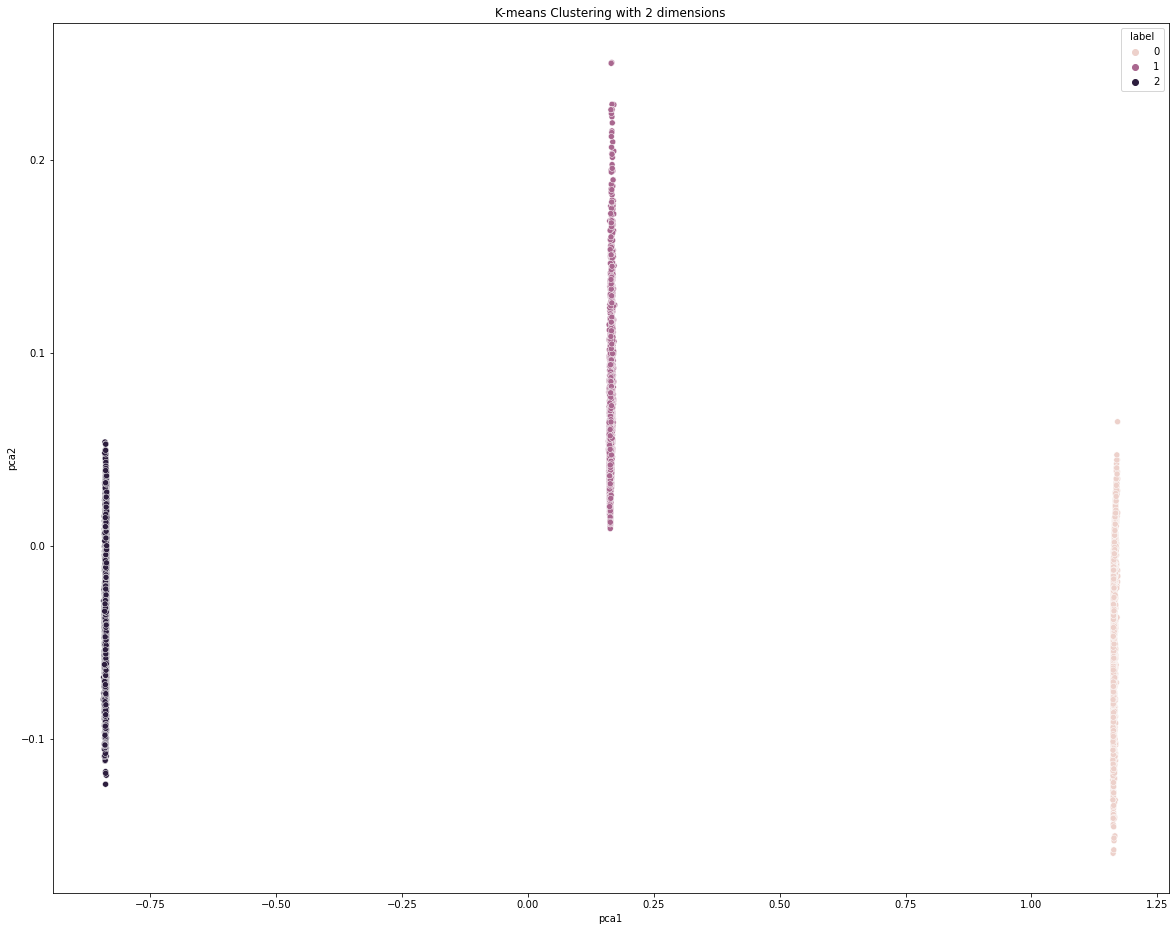

In [176]:
from sklearn.decomposition import PCA
import seaborn as sn
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(batting_heavy_abvanced_main_norm)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
plt.figure(figsize=(20,16))
sn.scatterplot(x="pca1", y="pca2", hue=batting_heavy_abvanced_main_norm['label'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()
